In [1]:
import os

In [2]:
import cv2
vidcap=cv2.VideoCapture('./A walk around Hazratganj Lucknow-SU05fJL6430.mp4')
success, image = vidcap.read()
fps = vidcap.get(cv2.CAP_PROP_FPS)
diff=[]
times=[]

In [3]:
count = 0

In [4]:
import numpy as np

In [5]:
image.shape
#A keyframe should be a lot more different from the previous frame since it's the starting or ending of a transition

(1080, 1920, 3)

In [6]:
 while success:
        count=count+1
        success,image = vidcap.read()
        times.append(count/fps)
        successnext,imagenext =vidcap.read()
        if successnext:
            diff.append(sum(cv2.sumElems(cv2.absdiff(image,imagenext))))

In [7]:
print(diff[:10])

[75408697.0, 78991689.0, 57502741.0, 56437274.0, 53850206.0, 49865713.0, 46503355.0, 52854099.0, 53871819.0, 57705236.0]


In [8]:
import matplotlib.pyplot as plt

(array([ 10.,  51., 112., 141., 168., 169., 141.,  62.,  27.,  18.]),
 array([3.26972500e+07, 4.99128775e+07, 6.71285050e+07, 8.43441325e+07,
        1.01559760e+08, 1.18775388e+08, 1.35991015e+08, 1.53206642e+08,
        1.70422270e+08, 1.87637898e+08, 2.04853525e+08]),
 <BarContainer object of 10 artists>)

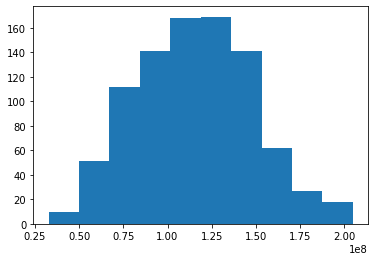

In [9]:
plt.hist(diff)

In [10]:
import scipy.stats
mad=scipy.stats.median_abs_deviation(diff)
print(mad)
print(np.median(diff))

24173612.0
116802002.0


In [11]:
criteria=np.median(diff)+1.56*mad

In [12]:
matches=[i for i,v in enumerate(diff) if v > criteria]

In [13]:
print(matches) #Lots of adjacent frames. Need to filter

[198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 218, 219, 220, 221, 222, 223, 224, 225, 226, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 308, 309, 310, 311, 320, 354, 355, 356, 357, 358, 359, 361, 362, 400, 401, 402, 403, 404, 405, 406, 407, 408, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 559, 560, 561, 562, 563, 564, 565, 617, 618, 619, 620, 621, 719, 720, 721, 727, 728, 729, 807, 808, 809, 817, 818, 819, 824, 825, 833]


In [14]:
numbers=np.array(matches)
import itertools

In [15]:
nd = [0] + list(np.where(np.diff(numbers) > 9)[0] + 1) + [len(numbers)]

a, b = itertools.tee(nd)
next(b, None)
res = {}
for j, (f, b) in enumerate(zip(a, b)):
    res[j] = numbers[f:b]
print(res)

{0: array([198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210,
       218, 219, 220, 221, 222, 223, 224, 225, 226]), 1: array([272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284,
       285, 286]), 2: array([308, 309, 310, 311, 320]), 3: array([354, 355, 356, 357, 358, 359, 361, 362]), 4: array([400, 401, 402, 403, 404, 405, 406, 407, 408, 414, 415, 416, 417,
       418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430,
       431, 432]), 5: array([559, 560, 561, 562, 563, 564, 565]), 6: array([617, 618, 619, 620, 621]), 7: array([719, 720, 721, 727, 728, 729]), 8: array([807, 808, 809, 817, 818, 819, 824, 825, 833])}


In [16]:
keyframes=[]
for i in range(1,len(res)):
    keyframes.append(int(np.median(np.array(res[i])))) #taking the median frame

In [17]:
np.array(times)[keyframes] #get the times

array([ 9.33742444, 10.37121072, 11.93856411, 13.97278872, 18.77489272,
       20.67572556, 24.17725972, 27.3119665 ])

In [18]:
vidcap=cv2.VideoCapture('./A walk around Hazratganj Lucknow-SU05fJL6430.mp4')
success, image = vidcap.read()
os.chdir('./images/')
for i in keyframes:
    vidcap.set(1,i)
    success, image = vidcap.read()
    current=np.array(times)[i]
    cv2.imwrite(str(current)+'.jpg',image)

In [19]:
from pytorchyolo import detect, models

In [20]:
model = models.load_model(
  "/home/scyther/Downloads/yolov3/PyTorch-YOLOv3/config/yolov3.cfg", 
"/home/scyther/Downloads/yolov3/PyTorch-YOLOv3/weights/yolov3.weights")

In [21]:
x = [f.name for f in os.scandir() if f.is_file()]
print(x)

['9.337424444444444.jpg', '10.371210722222221.jpg', '11.938564111111111.jpg', '13.972788722222221.jpg', '18.774892722222223.jpg', '20.675725555555555.jpg', '24.17725972222222.jpg', '27.3119665.jpg']


In [22]:
objects=[]
for i in x:
    img = cv2.imread(i)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    boxes = detect.detect_image(model, img)
    objects.append(len(boxes))
    print('Number of objects detected :'+str(len(boxes)))

Number of objects detected :5
Number of objects detected :2
Number of objects detected :8
Number of objects detected :13
Number of objects detected :11
Number of objects detected :13
Number of objects detected :6
Number of objects detected :14


In [23]:
print('Maximum number of objects:' +str(max(objects)) +  ' found at '+  str( np.array(x)[np.argmax(objects)]) )

Maximum number of objects:14 found at 27.3119665.jpg
